# SARS-CoV-2

Database from NCBI Virus filtered by Collection Date = 9/1/2020 - 10/20/2020.

In [1]:
# Load Data from https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Wuhan%20seafood%20market%20pneumonia%20virus,%20taxid:2697049&utm_source=gquery&utm_medium=referral&utm_campaign=COVID-19
# https://www.ncbi.nlm.nih.gov/

import pandas as pd
import numpy as np

seq_df = pd.read_csv('C:\PythonScripts\Database-for-projects\SARS-CoV-2\sequences.csv')

In [2]:
seq_df.head()

,Accession,SRA_Accession,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,MW035489,NaN,2020-09-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29323,GenBank,partial,NaN,NaN,"Moreno,G., Braun,K., Baczenas,J.J., Baker,D.",NaN,"USA: Wisconsin, Brown county",WI,Homo sapiens,oronasopharynx,2020-09-01,NaN,Severe acute respiratory syndrome coronavirus ...
1,MW035494,NaN,2020-09-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29323,GenBank,partial,NaN,NaN,"Moreno,G., Braun,K., Baczenas,J.J., Baker,D.",NaN,"USA: Wisconsin, Dane county",WI,Homo sapiens,oronasopharynx,2020-09-02,NaN,Severe acute respiratory syndrome coronavirus ...
2,MW031002,NaN,2020-09-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29323,GenBank,partial,NaN,NaN,"Moreno,G., Braun,K., Baczenas,J.J., Baker,D.",NaN,"USA: Wisconsin, Dane county",WI,Homo sapiens,"saliva, oronasopharynx",2020-09-09,NaN,Severe acute respiratory syndrome coronavirus ...
3,MW035478,NaN,2020-09-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29485,GenBank,partial,NaN,NaN,"Moreno,G., Braun,K., Baczenas,J.J., Baker,D.",NaN,"USA: Wisconsin, Dane county",WI,Homo sapiens,oronasopharynx,2020-09-02,NaN,Severe acute respiratory syndrome coronavirus ...
4,MW035482,NaN,2020-09-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29494,GenBank,partial,NaN,NaN,"Moreno,G., Braun,K., Baczenas,J.J., Baker,D.",NaN,"USA: Wisconsin, Dane county",WI,Homo sapiens,oronasopharynx,2020-09-01,NaN,Severe acute respiratory syndrome coronavirus ...


In [3]:
seq_df['Geo_Location'].unique()

array(['USA: Wisconsin, Brown county', 'USA: Wisconsin, Dane county',
       'USA: FL', 'Australia: Victoria', 'USA: WA', 'USA', 'Malta',
       'USA: Washington,King County', 'USA: TX',
       'USA: Wisconsin, Jefferson county', 'USA: New York, Nassau county',
       'USA: Wisconsin, Dodge county',
       'USA: California, San Diego county',
       'USA: Wisconsin, Adams county', 'USA: Wisconsin, Iowa county',
       'USA: Wisconsin, Rock county', 'USA: Wisconsin, Columbia county',
       'USA: California, Los Angeles county',
       'USA: Wisconsin, Monroe county', 'USA: New York, New York county',
       'USA: New York, Westchester county', 'USA: Wisconsin, Sauk county',
       'USA: New Jersey, Morris county', 'USA: Wisconsin, Lincoln county',
       'USA: Illinois, Cook county', 'USA: New York, Putnam county',
       'USA: Missouri, Saint Louis county',
       'USA: Wisconsin, Sheboygan county',
       'USA: Wisconsin, Marathon county',
       'USA: Illinois, Winnebago county',
  

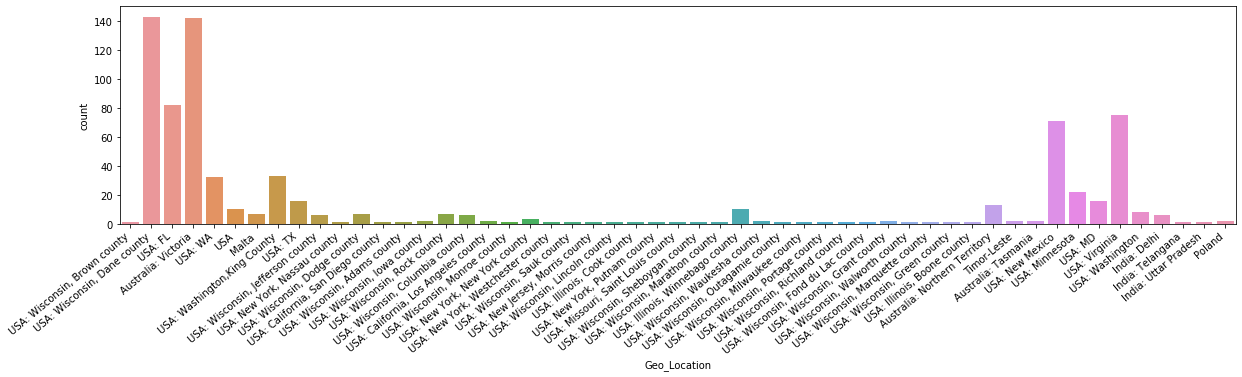

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
plot = sns.countplot(seq_df['Geo_Location'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 40, ha='right')
plt.show()

In [5]:
accession = []
accession = seq_df ['Accession']

In [6]:
len(accession)

754

## 1 - Entrez 

In [7]:
from Bio import Entrez

#Connection with API of NCBI
Entrez.email = 'anna0ledwon@gmail.com'
refseq_handle = open("ref_seq.gb", "w")
handle = Entrez.efetch(db='nuccore', id='NC_045512', rettype = 'gb', retmode='text')
record = handle.read()
refseq_handle.write(record)
refseq_handle.close()

In [8]:
# load the new created file -> ref_seq.gb
! cat ref_seq.gb

LOCUS       NC_045512              29903 bp ss-RNA     linear   VRL 18-JUL-2020
DEFINITION  Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1,
            complete genome.
ACCESSION   NC_045512
VERSION     NC_045512.2
DBLINK      BioProject: PRJNA485481
KEYWORDS    RefSeq.
SOURCE      Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
  ORGANISM  Severe acute respiratory syndrome coronavirus 2
            Viruses; Riboviria; Orthornavirae; Pisuviricota; Pisoniviricetes;
            Nidovirales; Cornidovirineae; Coronaviridae; Orthocoronavirinae;
            Betacoronavirus; Sarbecovirus.
REFERENCE   1  (bases 1 to 29903)
  AUTHORS   Wu,F., Zhao,S., Yu,B., Chen,Y.M., Wang,W., Song,Z.G., Hu,Y.,
            Tao,Z.W., Tian,J.H., Pei,Y.Y., Yuan,M.L., Zhang,Y.L., Dai,F.H.,
            Liu,Y., Wang,Q.M., Zheng,J.J., Xu,L., Holmes,E.C. and Zhang,Y.Z.
  TITLE     A new coronavirus associated with human respiratory disease in
            China
  JOURNAL   Nature 579 (7

In [9]:
# download all sequneces from the accession list

Entrez.email = 'anna0ledwon@gmail.com'
epost_handle = Entrez.epost(db='nuccore', id=','.join(accession))
search_results = Entrez.read(epost_handle)
search_results

                     ALGVLMSNLGMPSYCTGYREGYLNSTNVTIATYCTGSIPCSVCLSGLDSLDTYPSLET
                     IQITISSFKWDLTAFGLVAEWFLAYILFTRFFYVLGLAAIMQLFFSYFAVHFISNSWL
                     MWLIINLVQMAPISAMVRMYIFFASFYYVWKSYVHVVDGCNSSTCMMCYKRNRATRVE
                     CTTIVNGVRRSFYVYANGGKGFCKLHNWNCVNCDTFCAGSTFISDEVARDLSLQFKRP
                     INPTDQSSYIVDSVTVKNGSIHLYFDKAGQKTYERHSLSHFVNLDNLRANNTKGSLPI
                     NVIVFDGKSKCEESSAKSASVYYSQLMCQPILLLDQALVSDVGDSAEVAVKMFDAYVN
                     TFSSTFNVPMEKLKTLVATAEAELAKNVSLDNVLSTFISAARQGFVDSDVETKDVVEC
                     LKLSHQSDIEVTGDSCNNYMLTYNKVENMTPRDLGACIDCSARHINAQVAKSHNIALI
                     WNVKDFMSLSEQLRKQIRSAAKKNNLPFKLTCATTRQVVNVVTTKIALKGGKIVNNWL
                     KQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGYKAIDGGVTRDIASTDTCFA
                     NKHADFDTWFSQRGGSYTNDKACPLIAAVITREVGFVVPGLPGTILRTTNGDFLHFLP
                     RVFSAVGNICYTPSKLIEYTDFATSACVLAAECTIFKDASGKPVPYCYDTNVLEGSVA
                     YESLRPDTRYVLMDGSIIQ

{'QueryKey': '1', 'WebEnv': 'MCID_5f8f246a27de202d0a13d1db'}

In [10]:
webenv = search_results['WebEnv']
query_key= search_results['QueryKey']

In [11]:
batch_size=50
out_handle = open('SARS-CoV-2_coronasopharynx.gb', 'w')
count = len(accession)

for start in range(0, count, batch_size):
    end = min(count, start + batch_size)
    print('Download %i to %i' % (start + 1, end) + '...')
    efetch_handle = Entrez.efetch(
        db = 'nuccore',
        rettype = 'gb',
        retmode = 'text',
        retstart=start,
        retmax=batch_size,
        webenv = webenv,
        query_key=query_key,
    )
    
    records = efetch_handle.read()
    efetch_handle.close()
    out_handle.write(records)
    
out_handle.close()
print('All files downloaded :D')

Download 1 to 50...
Download 51 to 100...
Download 101 to 150...
Download 151 to 200...
Download 201 to 250...
Download 251 to 300...
Download 301 to 350...
Download 351 to 400...
Download 401 to 450...
Download 451 to 500...
Download 501 to 550...
Download 551 to 600...
Download 601 to 650...
Download 651 to 700...
Download 701 to 750...
Download 751 to 754...
All files downloaded :D


In [12]:
! head SARS-CoV-2_coronasopharynx.gb

LOCUS       MW035489               29323 bp    RNA     linear   VRL 24-SEP-2020
DEFINITION  Severe acute respiratory syndrome coronavirus 2 isolate
            SARS-CoV-2/human/USA/WI-UW-1319/2020 ORF1ab polyprotein (ORF1ab)
            and ORF1a polyprotein (ORF1ab) genes, partial cds; surface
            glycoprotein (S), ORF3a protein (ORF3a), envelope protein (E),
            membrane glycoprotein (M), and ORF6 protein (ORF6) genes, complete
            cds; ORF7a protein (ORF7a) and ORF7b (ORF7b) genes, partial cds;
            ORF8 protein (ORF8) and nucleocapsid phosphoprotein (N) genes,
            complete cds; and ORF10 protein (ORF10) gene, partial cds.
ACCESSION   MW035489


## 2 - Prepping/Cleaning/Sorting Data

In [15]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [16]:
CoV = SeqIO.parse('SARS-CoV-2_coronasopharynx.gb', 'genbank')
CoV

In [17]:
count = 0

for record in CoV:
    count +=1
    
count

754

In [19]:
ref_seq = SeqIO.read('ref_seq.gb', 'genbank')
ref_seq

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=['BioProject:PRJNA485481'])